### MS 263 In-class problems: Feb. 27 2018

#### 1. Uncertainty in surface ocean CO$_2$ calculations

The equation for computing CO$_2$ concentrations from measurements of dissolved inorganic carbon (DIC) and pH is given by

$$ [CO_2]=  \frac{[DIC]}{\left(1+ \frac{K_1'}{H^+}+\frac{K_1'K_2'}{[H^+]^2}\right)} $$

where the dissociation constants that govern the dissociation of CO$_2$ into carbonate and bicarbonate are known from laboratory measurements and are given on a logarithmic scale as $pK'_1 = -\log{K'_1} = $ 5.847 and $pK'_1 = -\log{K'_2} = $ 8.966.

The fugacity (partial pressure, not accounting for non-ideal gas effects) of CO$_2$ can be calculated using

$$ fCO_2 = \frac{[CO_2]}{K_H}$$

where $K_{H,CO_2}$ =  3.24x10$^{-2}$ mol/(kg atm) is Henry's Law constant.

Measurements of DIC have an analytical uncertainty of +/-2 $\mu$mol/kg. Measurements of pH have an analytical uncertainty of +/- 0.0020.

Typical surface values are [DIC] $\approx$ 2000 $\mu$mol/kg and pH $\approx$ 8.1. What is the uncertainty in $fCO_2$ calculated from these values?

In [1]:
from uncertainties import ufloat

DIC=2000
k1=10**-5.847
k2=10**-8.966
pH=ufloat(8.1,0.002)  #uncertainties
H=10**-pH
kh=(3.24*10**-2)

#co_concentration=DIC/(1+(k1/pH)+((k1*k2)/(pH**2)))
#print(co_concentration)
DICuncert=ufloat(2000,2)  #uncertainty 
#print(DICuncert)
fco2=(DICuncert/(1+(k1/H)+((k1*k2)/(H**2))))/kh
#fco2=co_concentration/kh
print(fco2)
                     

301.9+/-1.6


#### 2. Harmonic analysis

Fit an annual cycle to a two-year time series of monthly SST data (source: Emery and Thomson).

* Write out the problem as a system of equations, and in matrix form.
* Create a design matrix A - start with a matrix of NaNs, then fill in the columns.
* Use `np.linalg.lstsq` to solve for the coefficients.
* Plot the modeled fit on top of the data.

<IPython.core.display.Javascript object>


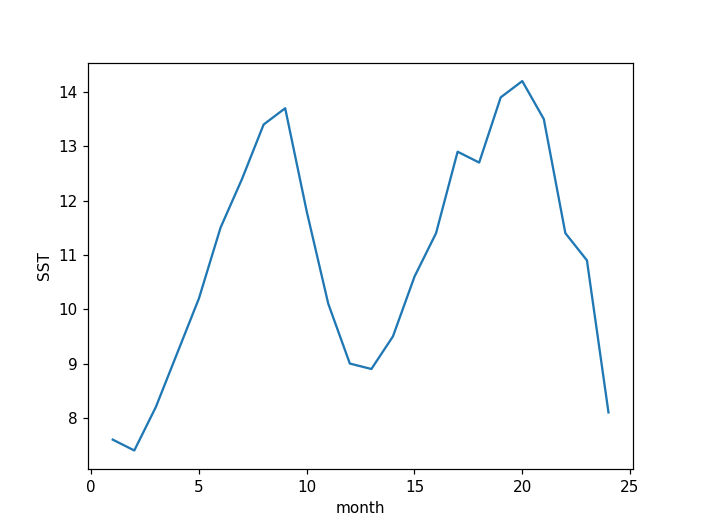

[ 10.9375      -1.98067816  -1.78797519]


<IPython.core.display.Javascript object>


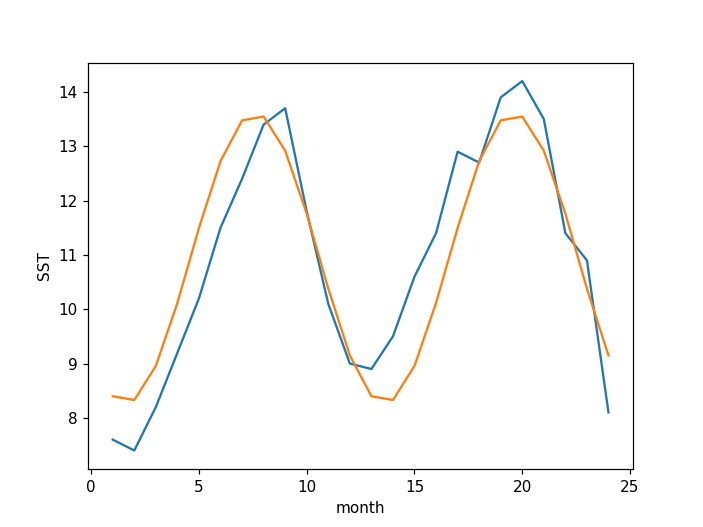

[  8.39872898   8.3281948    8.95682184  10.11617     11.49559286
  12.72547519  13.47627102  13.5468052   12.91817816  11.75883     10.37940714
   9.14952481   8.39872898   8.3281948    8.95682184  10.11617     11.49559286
  12.72547519  13.47627102  13.5468052   12.91817816  11.75883     10.37940714
   9.14952481]
(24,)


In [34]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt

t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])
plt.plot(t,SST)
plt.xlabel('month')
plt.ylabel('SST')

rows_n=25
columns_m=3

matrix=np.ones([24,3])
#print(matrix)
#print(np.shape(matrix))

column2=np.array(np.sin(2*np.pi/12*t))
#print(column2)
#print(np.shape(column2))
column3=np.array(np.cos(2*np.pi/12*t))
#print(column3)

matrix[:,1]=column2
#print(matrix)

matrix[:,2]=column3
#print(matrix)


c=np.linalg.lstsq(matrix,SST)
#print(c)
c[0]
coefficients=c[0]
print(coefficients)
#print(coefficients[0])
plt.figure()
plt.plot(t,SST)
plt.xlabel('month')
plt.ylabel('SST')
plt.show()


c=coefficients[0]+coefficients[1]*column2+coefficients[2]*column3   #have to solve for new y values to be able to plot
print(c) 
print(np.shape(c))

plt.plot(t,c)
#plt.show()



#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

[ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]
[ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]


<IPython.core.display.Javascript object>


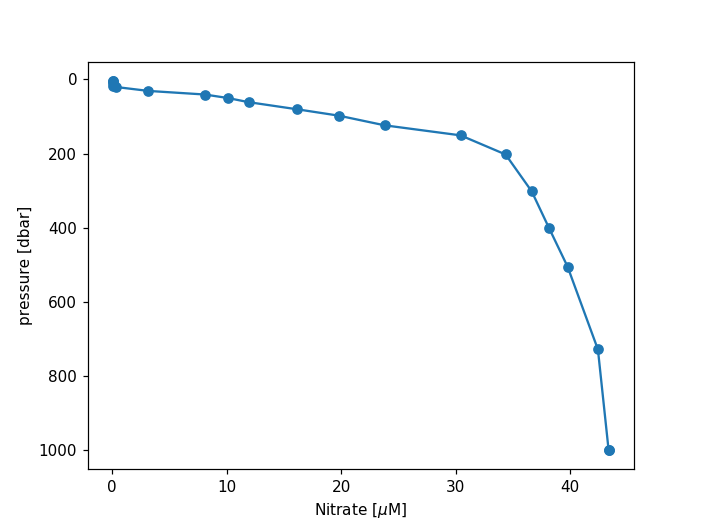

Text(0,0.5,'pressure [dbar]')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = 'WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

nitrate=np.array(cast['NITRAT'])  #making the data from nitrate into an array with index of cast
nit_len=len(nitrate)              #taking the length of the array to use in for loop
pressure=np.array(cast['CTDPRS'])   #making the data from pressure into an array with index cast
pres_len=len(pressure)               #Taking the length of the pressure data to use in the for loop 
#print(nitrate)
#print(pressure)

change_nitrate=np.diff(nitrate)      #finding the change in nitrate by taking the difference between two numbers

#print(change_nitrate)

change_pressure=np.diff(pressure)   #finding the change in pressure by taking the difference between two numbers
#print(change_pressure)

vert_gradient=change_nitrate/change_pressure   #finding the vertical change in nitrate by dividing the change in nitrate by the chnage in pressure
print(vert_gradient)

change_nit=[]                    #creating an empty array to use when appending
for val in np.array(range(0,pres_len-1)):    #using range from 0-the length of the array minus 1
    nit_val_change=nitrate[val+1]-nitrate[val]             #using val as an index in nitrate to get the correct numbers 
    change_nit=np.append(change_nit,nit_val_change)    #appending the change in nitrate to the empty array
    
    #print(change_nit)


change_pres=[]    #creating an empty array to use when appending
for val in np.array(range(0,pres_len-1)):   #using range from 0-length of array minus 1
    pres_val_change=pressure[val+1]-pressure[val]
    change_pres=np.append(change_pres,pres_val_change)   #appending the change in pressure to an empty array
    
    #print(change_pres)
    
vert_change_loop=change_nit/change_pres #dividing the change in nitrate by the change in pressure calculated from the for loop

print(vert_change_loop)


    
    
plt.figure()
plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')




#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

<IPython.core.display.Javascript object>


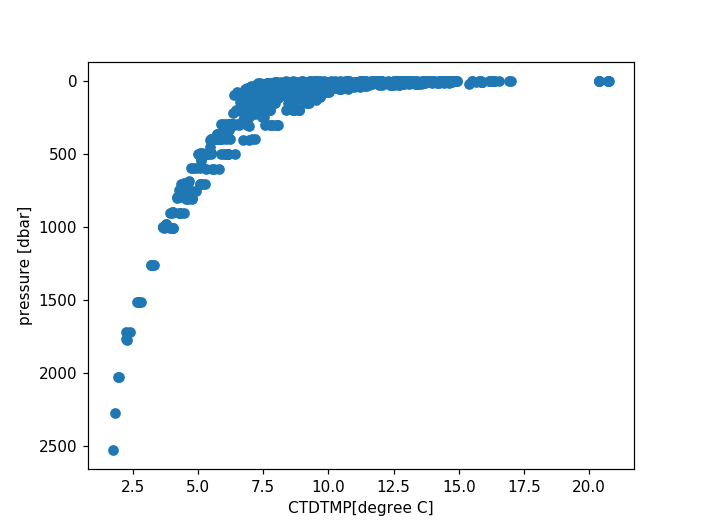

<IPython.core.display.Javascript object>


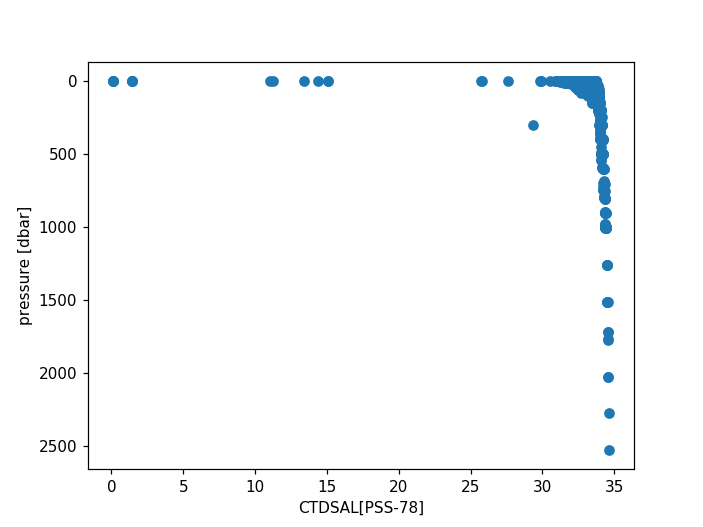

<IPython.core.display.Javascript object>


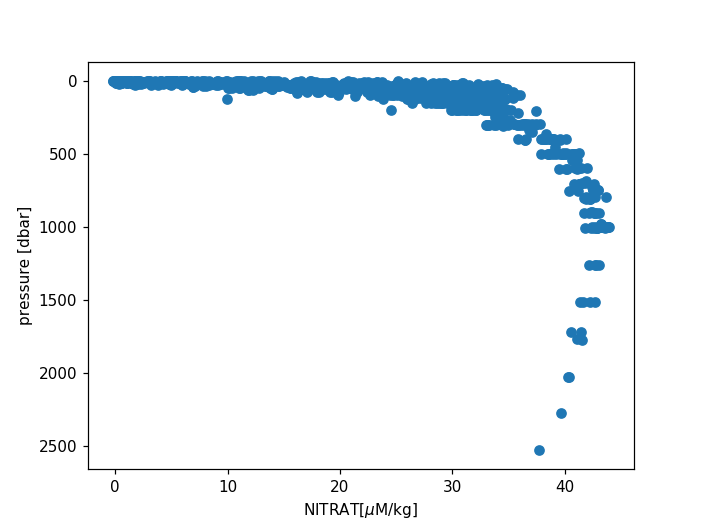

<IPython.core.display.Javascript object>


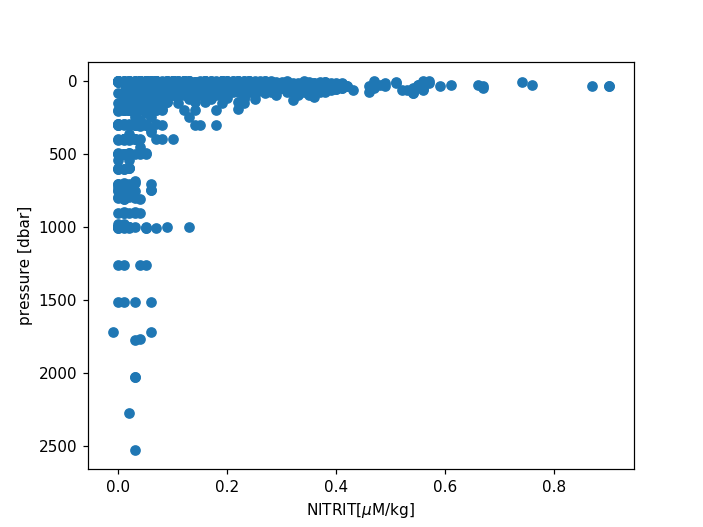

<IPython.core.display.Javascript object>


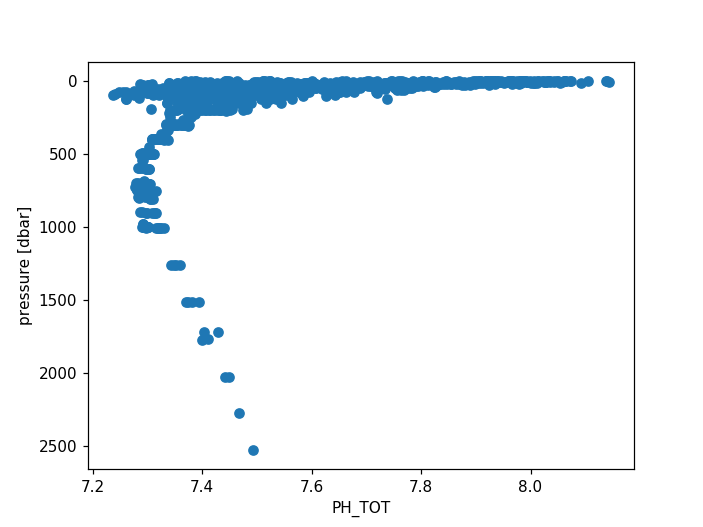

<IPython.core.display.Javascript object>


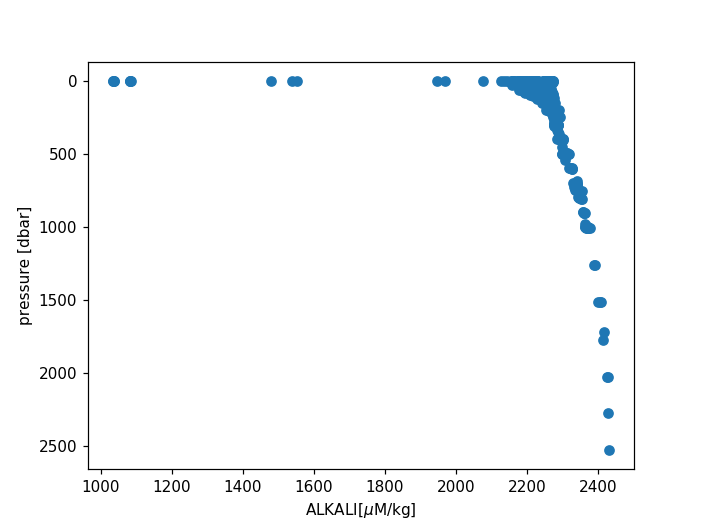

In [35]:
filename = 'WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']
pressure=np.array((df['CTDPRS']))   #adding an array of the pressure values
units=['[degree C]', '[PSS-78]','[$\mu$M/kg]','[$\mu$M/kg]','','[$\mu$M/kg]']  #making n array of x-labels to use later
i=0    #setting i=0 to that it will keep a count when running through loop
for var in variables_to_plot:
    data=df[var]  #using the data frame to get it to use all the vales in the data set
    plt.figure()
    plt.plot(data,pressure,'o')  #plotting pressure on y-axis and other variable on x-axis
    plt.gca().invert_yaxis()    #inversing y-axis to make it so that 0 pressure is at surface
    plt.xlabel(var + units[i])   #x-label will take from array above and loop through
    i=i+1     #keep adding 1 to i to get labels in correct order
    plt.ylabel('pressure [dbar]')   #y label stays constant 
    plt.show() 
    
    
 
    # insert code here

In [37]:
from mytools import harmonic  #importing harmonics from mytools

In [48]:
tannual=12
co=harmonic.seasonal_fit(t,SST,tannual)  #running the function to get the 4 coefficients 
print(co)

[ 9.96926458  0.07745883 -1.69159785 -1.86543403]


<IPython.core.display.Javascript object>


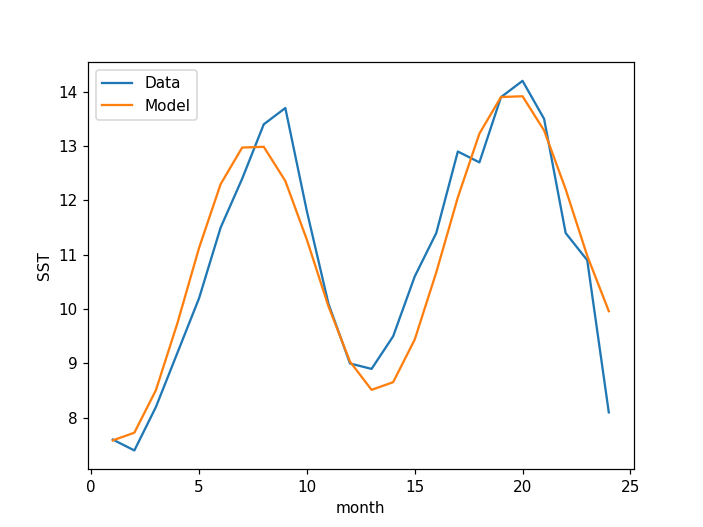

In [52]:
y_fit = (co[0] + co[1]*t + co[2]*np.sin(2*np.pi*t/12) + co[3]*np.cos(2*np.pi*t/12))  #plugging the coefficients into the equation to graoh
    
#looking at data again    
t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])
    
 #plotting the data   
plt.figure()
plt.plot(t,SST, label='Data')
plt.xlabel('month')
plt.ylabel('SST')



plt.plot(t,y_fit, label='Model')    #plotting the model line over the data

plt.legend()   #making legend to see which line represents which 